# Practical: PyTorch
In this practical, we will learn how to use PyTorch for some machine learning tasks.

[PyTorch](https://pytorch.org/) is a popular open-source machine learning library based on the Torch library. It is widely used for deep learning applications and provides a flexible and efficient platform for building and training neural networks.

## Features
- Tensors: PyTorch provides a powerful tensor library that allows for efficient computation on multi-dimensional arrays. Tensors are similar to NumPy arrays but can be used on GPUs for faster computation.
- Autograd: PyTorch has a built-in automatic differentiation engine that allows for easy computation of gradients. This is particularly useful for training neural networks using backpropagation.
- Dynamic computation graph: PyTorch uses a dynamic computation graph, which means that the graph is built on-the-fly as operations are performed. This allows for more flexibility in building complex models and makes debugging easier.
- Neural networks: PyTorch provides a high-level API for building and training neural networks. It includes pre-defined layers, loss functions, and optimizers that make it easy to build complex models.
- GPU support: PyTorch can easily switch between CPU and GPU computation, making it easy to take advantage of the speedup provided by GPUs.
- Community: PyTorch has a large and active community, which means that there are many resources available for learning and troubleshooting. There are also many pre-trained models and libraries available for use.

In [ ]:
# Installation
!pip3 install torch torchvision torchaudio torch_geometric

## Neural Networks
In PyTorch, neural networks are built using the `torch.nn` module. This module provides a variety of pre-defined layers, loss functions, and optimizers that can be used to build and train neural networks.


## Linear Regression
In this section, we will implement a simple linear regression model using PyTorch. Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features.


2.6542603969573975 2.1732187271118164


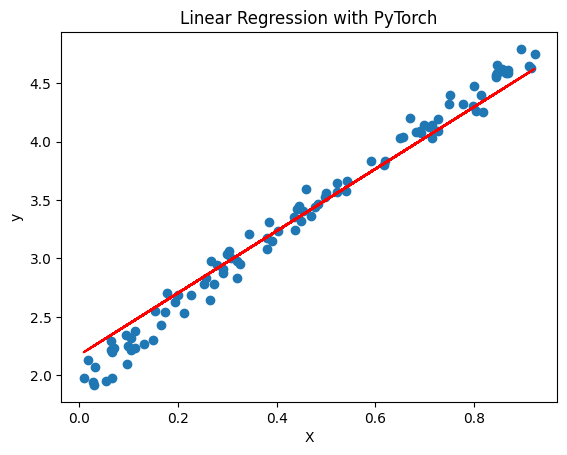

In [ ]:
import torch

# Generate some data
X = torch.rand(100, 1)
y = 3 * X + 2 + 0.1 * torch.randn(100, 1)  # y = 3x + 2 + noise

# Define model
model = torch.nn.Linear(1, 1)  
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for _ in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

print(model.weight.item(), model.bias.item())  # Should be close to 3 and 2

# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), model(X).detach().numpy(), 'r')
plt.title('Linear Regression with PyTorch')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


## Classification
In this section, we will implement a simple classification model using PyTorch. Classification is a supervised learning algorithm used for predicting a categorical target variable based on one or more input features.

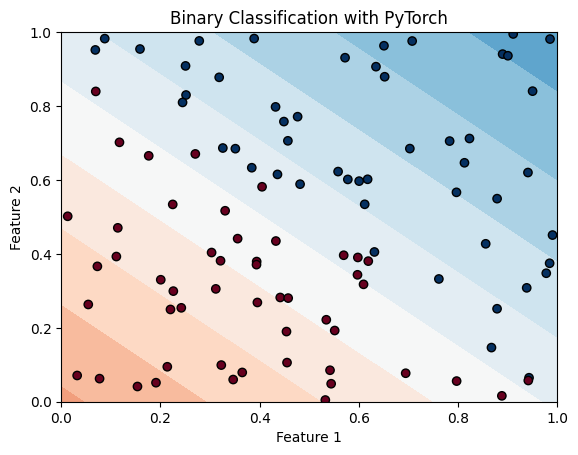

In [5]:
import numpy as np

import torch.nn.functional as F

# Simulated binary classification data
X = torch.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).float().unsqueeze(1)

model = torch.nn.Linear(2, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for _ in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
# Plotting
    
import matplotlib.pyplot as plt
    
# Get predictions
    
y_pred_np = torch.sigmoid(model(X)).detach().numpy()
    
# Plotting the decision boundary
    
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_torch = torch.tensor(grid, dtype=torch.float32)
probs = torch.sigmoid(model(grid_torch)).detach().numpy().reshape(xx.shape)
    
plt.contourf(xx, yy, probs, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu)
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy().ravel(), cmap=plt.cm.RdBu, edgecolors='k')
plt.title('Binary Classification with PyTorch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Clustering
In this section, we will implement a simple clustering model using PyTorch. Clustering is an unsupervised learning algorithm used for grouping similar data points together based on their features.

tensor([1, 2, 1, 1, 2, 0, 0, 1, 0, 2])


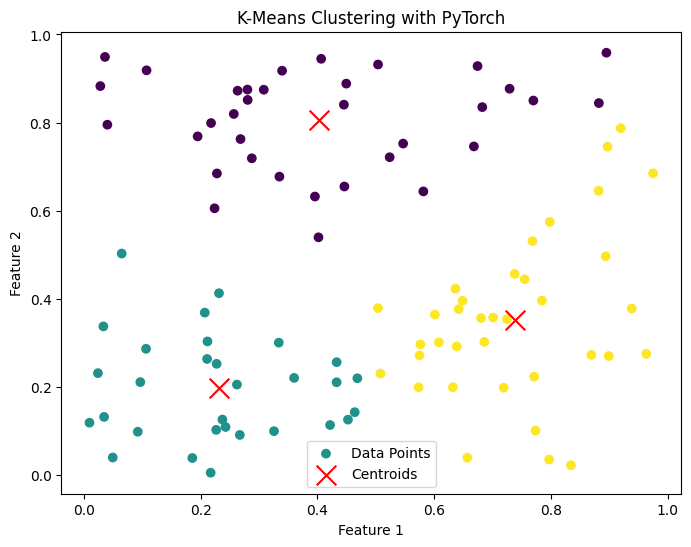

In [10]:
import torch

def kmeans(X, k, num_iters=10):
    """Simple K-Means implementation in PyTorch."""
    n_samples, n_features = X.shape
    centroids = X[torch.randperm(n_samples)[:k]]  # Randomly initialize centroids

    for _ in range(num_iters):
        # Compute distances to centroids
        distances = torch.cdist(X, centroids)  # Compute pairwise distances
        cluster_assignments = distances.argmin(dim=1)  # Assign clusters to points

        # Compute new centroids
        for i in range(k):
            centroids[i] = X[cluster_assignments == i].mean(dim=0)
    
    return cluster_assignments, centroids

# Sample data
X = torch.rand(100, 2)  # 100 points in 2D
labels, centroids = kmeans(X, k=3)

print(labels[:10])  # Cluster labels of first 10 points
import matplotlib.pyplot as plt

# Convert to numpy for plotting
X_np = X.numpy()
labels_np = labels.numpy()
centroids_np = centroids.numpy()

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=labels_np, cmap='viridis', label='Data Points')
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering with PyTorch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Reinforcement Learning
In this section, we will implement a simple reinforcement learning model using PyTorch. Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment and receiving feedback in the form of rewards or penalties.